## **Problem Statement**  

Estimating car prices is challenging because many factors like brand, mileage, engine size, and year of manufacture affect the price. Traditional methods often struggle to keep up with market changes, leading to inaccurate valuations. This project aims to build a machine learning model that analyzes key car features to predict prices more accurately. By cleaning the data, handling outliers, and selecting important features, the model improves reliability and helps buyers, sellers, and businesses make better pricing decisions.

In [555]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [556]:
df=pd.read_csv('cars_dataset.csv')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [557]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [558]:
df['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [559]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


From this table, here's how someone might infer insights based on the descriptive statistics provided for each variable:

1. **Brand**: 
   - There are 7 unique car brands, with the most frequent being *Volkswagen*, appearing 936 times. This suggests that *Volkswagen* is the most represented brand in the dataset.

2. **Price**:
   - There are 4173 entries with prices (out of 4345 total). The mean price is approximately 19,418, with a standard deviation of 25,584, indicating a wide price range.
   - The minimum price is 600, while the maximum is 300,000. The median (50th percentile) price is 11,500, showing that the price distribution is skewed with a few very expensive cars.

3. **Body**:
   - There are 6 unique car body types, with the most common being *sedan*, appearing 1649 times. This shows that sedans dominate the body types in this dataset.

4. **Mileage**:
   - The dataset contains 4345 entries for mileage, with a mean of 161.24 and a standard deviation of 105.71, showing significant variation in mileage.
   - The minimum mileage is 0 (probably brand new cars), while the maximum is 980.

5. **EngineV**:
   - There are 4195 entries for engine volume, with an average of 2.79 liters. The minimum is 0.6 liters, and the maximum is an unrealistic 99.99 liters, indicating possible outliers or data entry errors.

6. **Engine Type**:
   - There are 4 types of engines, with *Diesel* being the most frequent, appearing 2019 times. This suggests that diesel engines dominate the dataset.

7. **Registration**:
   - The dataset contains two types of registration: *yes* and *no*, with *yes* appearing 3947 times. This indicates that most cars are registered.

8. **Year**:
   - There are 4345 entries for the manufacturing year. The mean year is 2006.55, with a standard deviation of 6.71. The minimum year is 1969, and the maximum is 2016. The 50th percentile (median) year is 2008, indicating that most cars in the dataset are relatively modern.

9. **Model**:
   - There are 312 unique models, with the most frequent being the *E-Class*, appearing 199 times. This suggests that the dataset includes a wide range of car models, with some models more represented than others.

### Key Insights:
- The dataset is dominated by *Volkswagen* cars and *sedan* body types.
- There's a wide range of prices, with a few very expensive cars skewing the distribution.
- Mileage and engine volume show significant variation, which could be useful for further analysis, such as determining factors influencing the price.
- The most common engine type is *Diesel*, and most cars are registered.

This information would help in understanding the structure of the data and selecting relevant variables for predictive modeling (e.g., predicting car price).

### **DATA CLEANING**

In [562]:
new_df=df.drop(['Model'],axis=1)

In [563]:
new_df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [564]:
new_df.isnull().sum()*100/len(new_df)

Brand           0.000000
Price           3.958573
Body            0.000000
Mileage         0.000000
EngineV         3.452244
Engine Type     0.000000
Registration    0.000000
Year            0.000000
dtype: float64

We can see that there are null values in both the price and the enginveV
And also since the amount of the null values are less than 5% of the overall dataset we can replace the null values rather than filling some other values in it.This selective removal ensures a minimal impact on the overall dataset while enhancing data quality for subsequent analyses or modeling endeavors. So first replace the null values


In [566]:
new_df.dropna(axis=0,inplace=True)

In [567]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4025 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 283.0+ KB


From the above we can say that the numerical columns are Price,EngineV,Milege,Year. Now we will only check outliers for price, engineV and milege because year has a time range and it cant be extreamly low and it cant be extreamely high so we dont considernit as an pottential outlier in other words it does not exhibit the same variability as numerical variables like "Price," "Mileage," and "EngineV." Now lets see the other 3 features

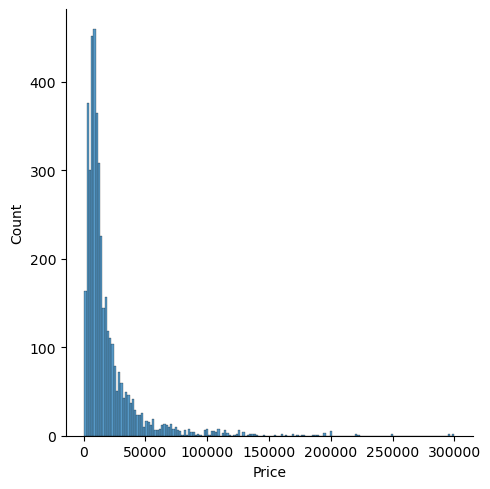

In [569]:
sns.displot(df['Price'])

In [570]:
df['Price'].describe()

count      4173.000000
mean      19418.746935
std       25584.242620
min         600.000000
25%        6999.000000
50%       11500.000000
75%       21700.000000
max      300000.000000
Name: Price, dtype: float64

From this we can say that the data is right scewked because the mean is greater than the median so it means there are potential outliers and that to too many that is pulling the mean in an upward direction ie the outliers lie in the highest price range so now lets normalize the dataset by elimination top 2% of the outliers which are the highest datapoints and get something in normal distribution.  

<Axes: ylabel='Price'>

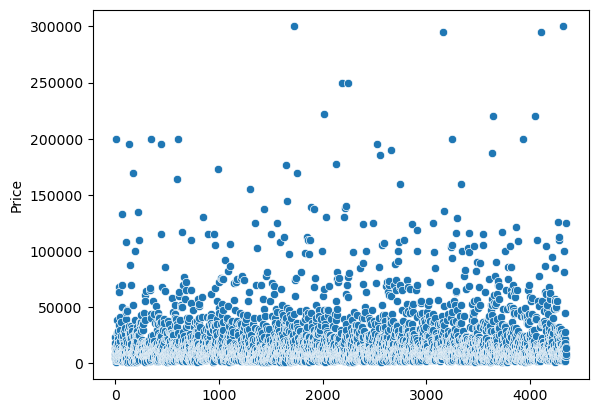

In [572]:
sns.scatterplot(df['Price'])

Here above we are able to see that there are outliers

A **quantile** divides a dataset into equal parts to show the distribution of values. For example, the 0.98 quantile (or 98th percentile) identifies the value below which 98% of the data falls. Quantiles are useful for detecting outliers, understanding data spread, and determining cut-off points for analysis. Common quantiles include percentiles (100 equal parts) and quartiles (4 equal parts).Common types of quantiles include:

Percentiles: Divides the data into 100 equal parts. The 98th percentile corresponds to the value below which 98% of the data points fall.
Quartiles: Divides the data into 4 equal parts. The 1st quartile (Q1) is the 25th percentile, and the 3rd quartile (Q3) is the 75th percentile.
Medians: The 50th percentile, or the middle value of the data, is called the median.
Quantiles help in outlier detection, understanding the spread of data, and preparing data for further statistical analysis.

Now lets get the 98% pf the dataset by eliminationg the 2%

In [576]:
N_df=df['Price'].quantile(0.98)

This step filters the dataset to only include rows where the Price is below the 98th percentile. By removing the top 2% of the highest-priced data points, we mitigate the influence of outliers that could skew the distribution and impact the performance of regression models.

In [578]:
df_clean=new_df[new_df['Price']<N_df]
df_clean.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


### **EXPLORATORY DATA ANALYSIS**

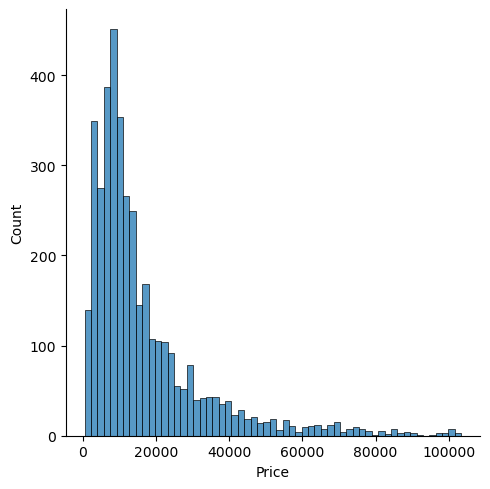

In [580]:
sns.displot(df_clean['Price'])

<Axes: ylabel='Price'>

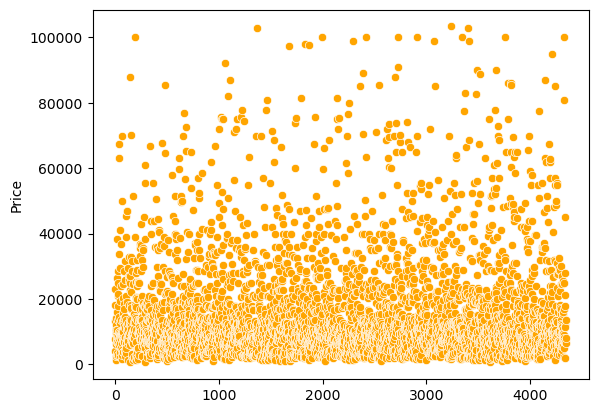

In [581]:
sns.scatterplot(df_clean['Price'],color='orange')

Now after eliminating the 2% of the outliers we have enhanced the graph showing the topshowing a better distribution plot of price.This adjustment results in more balanced and improved distribution and representing better pricing patterns. The strategic outlier handling enriches the overall understanding of pricing dynamics

In [583]:
# NOW LETS DO THE SAME FOR MILEGE

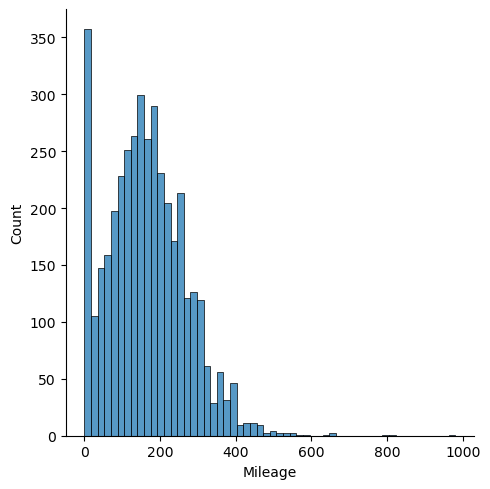

In [584]:
sns.displot(new_df['Mileage'])

<Axes: ylabel='Mileage'>

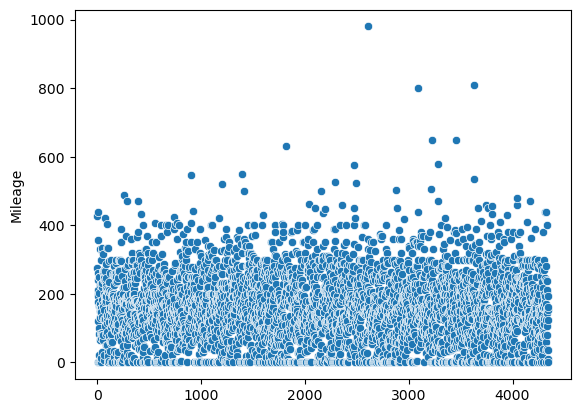

In [585]:
sns.scatterplot(new_df['Mileage'])

In [586]:
m=df['Mileage'].quantile(0.99)
df_clean=new_df[new_df['Mileage']<m]

In [587]:
df_clean.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


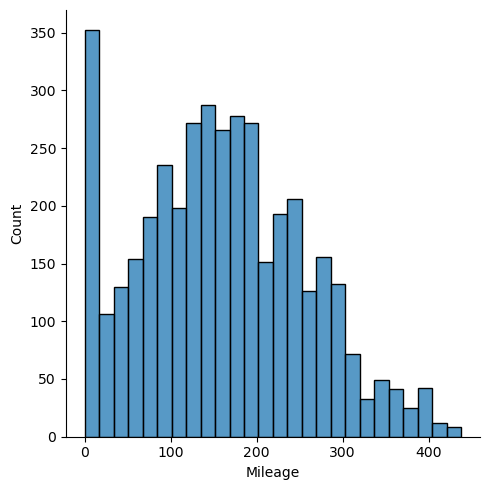

In [588]:
sns.displot(df_clean['Mileage'])

<Axes: ylabel='Mileage'>

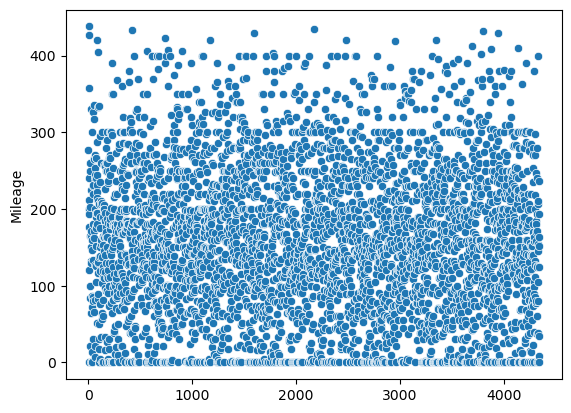

In [589]:
sns.scatterplot(df_clean['Mileage'])

In [590]:
df_clean.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


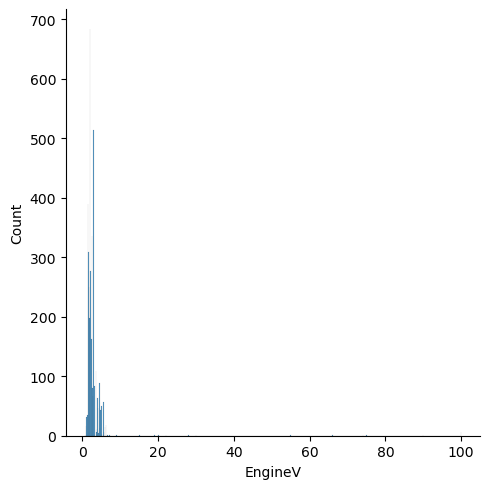

In [591]:
sns.displot(df_clean['EngineV'])

In [592]:
df_clean[df_clean['EngineV']>90].nunique()

Brand           4
Price           7
Body            3
Mileage         7
EngineV         1
Engine Type     4
Registration    2
Year            7
dtype: int64

In [593]:
df_clean['EngineV'].describe()

count    3986.000000
mean        2.768404
std         4.959313
min         0.600000
25%         1.800000
50%         2.200000
75%         3.000000
max        99.990000
Name: EngineV, dtype: float64

I can tell that there may be **wrong or suspicious data** in the "EngineV" column based on the distribution shown in the graph. Here’s why:

1. **Unrealistic Values**: In the plot, we see that some values for "EngineV" go beyond **90**, which is unrealistic for engine volume. Typical engine volumes for most cars are usually between **1 and 6 liters**. Values above this range are highly unusual and suggest incorrect data or entry errors.

2. **Clustered Data**: Most of the data is tightly clustered around the lower values (near 0), which is expected for engine volumes. The sudden spike to extremely high values indicates potential **outliers** or **data entry mistakes**.

3. **Distribution Shape**: The graph shows a long tail toward the higher values, meaning there are a few data points that are far larger than the rest. This long tail could distort analysis, especially in models like linear regression, where extreme values can have a large influence.

Because of these observations, it's clear that further investigation is needed by checking the **statistical summary** (e.g., mean, median, percentiles) to confirm whether these extreme values are valid or should be handled as outliers or incorrect data.

Online sources indicate that the maximum engine displacement for cars typically reaches 6 liters.


Max value=00.99 and according to online s

In [595]:
df_clean=new_df[new_df['EngineV']<6]

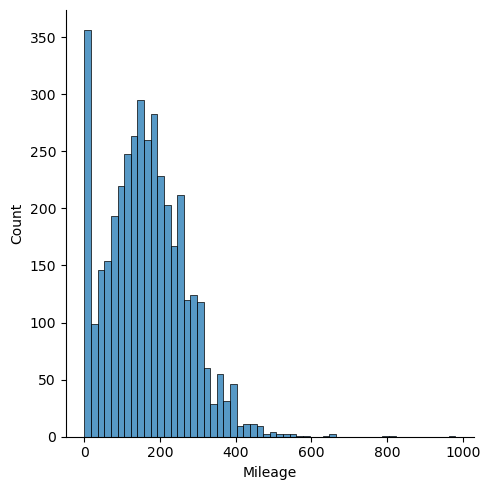

In [596]:
sns.displot(df_clean['Mileage'])

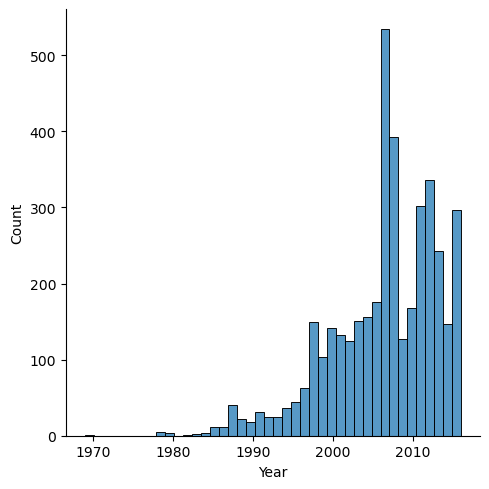

In [597]:
sns.displot(new_df['Year'])

The inference that removing the bottom 1% of vintage cars can improve the analysis comes from several key observations:

1. **Left-Skewed Distribution**: The presence of extremely old cars has created a **left-skewed distribution** in the dataset. In left-skewed data, a small number of very old cars are pulling the distribution in that direction, suggesting that these cars are outliers in terms of age.

2. **Vintage Cars' High Prices**: While vintage cars are generally older, they often have **higher prices** due to their rarity and collector value. These prices are not representative of the general car market and can distort the results of a regression model. Since the goal of regression analysis is to capture contemporary market trends, including these vintage cars would skew the model towards predicting higher prices for older vehicles, which doesn't align with typical market behavior for non-vintage cars.

3. **Outlier Influence**: Outliers, especially in regression analysis, can have an **undue influence** on the results, pulling the regression line toward them and affecting the accuracy of predictions for the majority of the data. Removing these outliers (the bottom 1% of old cars) allows for a more **balanced and representative model** that reflects current market trends without being distorted by rare, high-priced vintage vehicles.

Thus, the decision to remove the bottom 1% of the data, which represents these vintage cars, ensures that the analysis is more aligned with contemporary market trends and leads to more reliable regression outcomes.

In [599]:
ca=new_df['Year'].quantile(0.01)
df_clean=new_df[new_df['Year']>ca]
df_clean.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


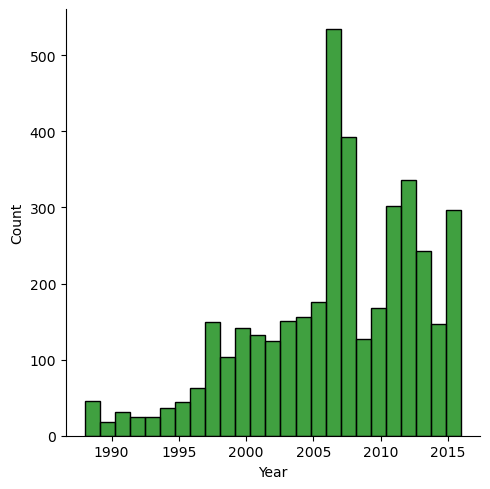

In [600]:
sns.displot(df_clean['Year'],color='green')

In [601]:
df_clean.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [602]:
f_df=df_clean.reset_index(drop=True)

In [603]:
f_df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [604]:
f_df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3969,3969.000000,3969,3969.000000,3969.000000,3969,3969,3969.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,866,NaN,1500,NaN,NaN,1850,3598,NaN
mean,NaN,19782.123988,NaN,162.738221,2.776105,NaN,NaN,2006.687831
std,NaN,25918.538393,NaN,102.930235,4.969395,NaN,NaN,6.202932
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7170.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,22000.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


**OLS (Ordinary Least Squares)** is a method used in **linear regression** to estimate the relationship between a dependent variable (the outcome or target) and one or more independent variables (the predictors or features). The goal of OLS is to find the best-fitting line through the data points by minimizing the sum of the squared differences (errors) between the observed values and the values predicted by the linear model.

### Key concepts in OLS:
1. **Minimizing Errors**: OLS aims to minimize the **residual sum of squares (RSS)**, which is the sum of the squared differences between the actual data points and the predicted values on the regression line. The smaller the RSS, the better the model fits the data.
   
2. **Regression Coefficients**: OLS calculates the coefficients (slopes and intercept) for the linear regression equation, representing the relationship between the predictors and the target variable.

3. **OLS Assumptions**:
   To get valid results from an OLS regression, several key assumptions must be met:
   - **Linearity**: The relationship between the independent and dependent variables is linear.
   - **Homoscedasticity**: The variance of the residuals (errors) is constant across all levels of the independent variables.
   - **No multicollinearity**: The independent variables should not be highly correlated with each other.
   - **Normality of residuals**: The residuals (differences between actual and predicted values) should be normally distributed.
   - **No autocorrelation**: The residuals should not be correlated with each other.

### Checking the OLS Assumptions:
When checking how "Price" is distributed with respect to other numerical columns like **"Year," "EngineV,"** and **"Mileage"**, you're essentially verifying that these variables meet the OLS assumptions, especially linearity, normality, and homoscedasticity. By plotting relationships and residuals, you can identify potential violations of these assumptions.

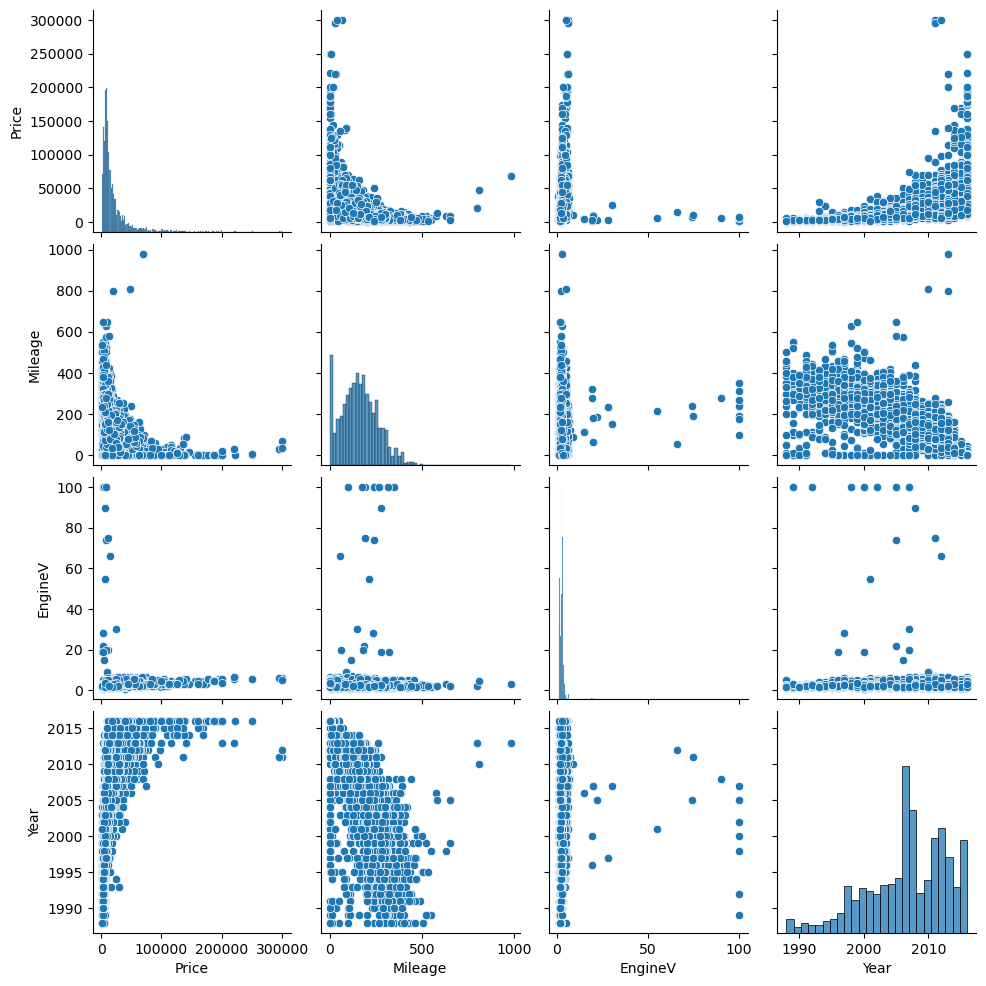

In [606]:
sns.pairplot(f_df)

Text(0, 0.5, 'Price')

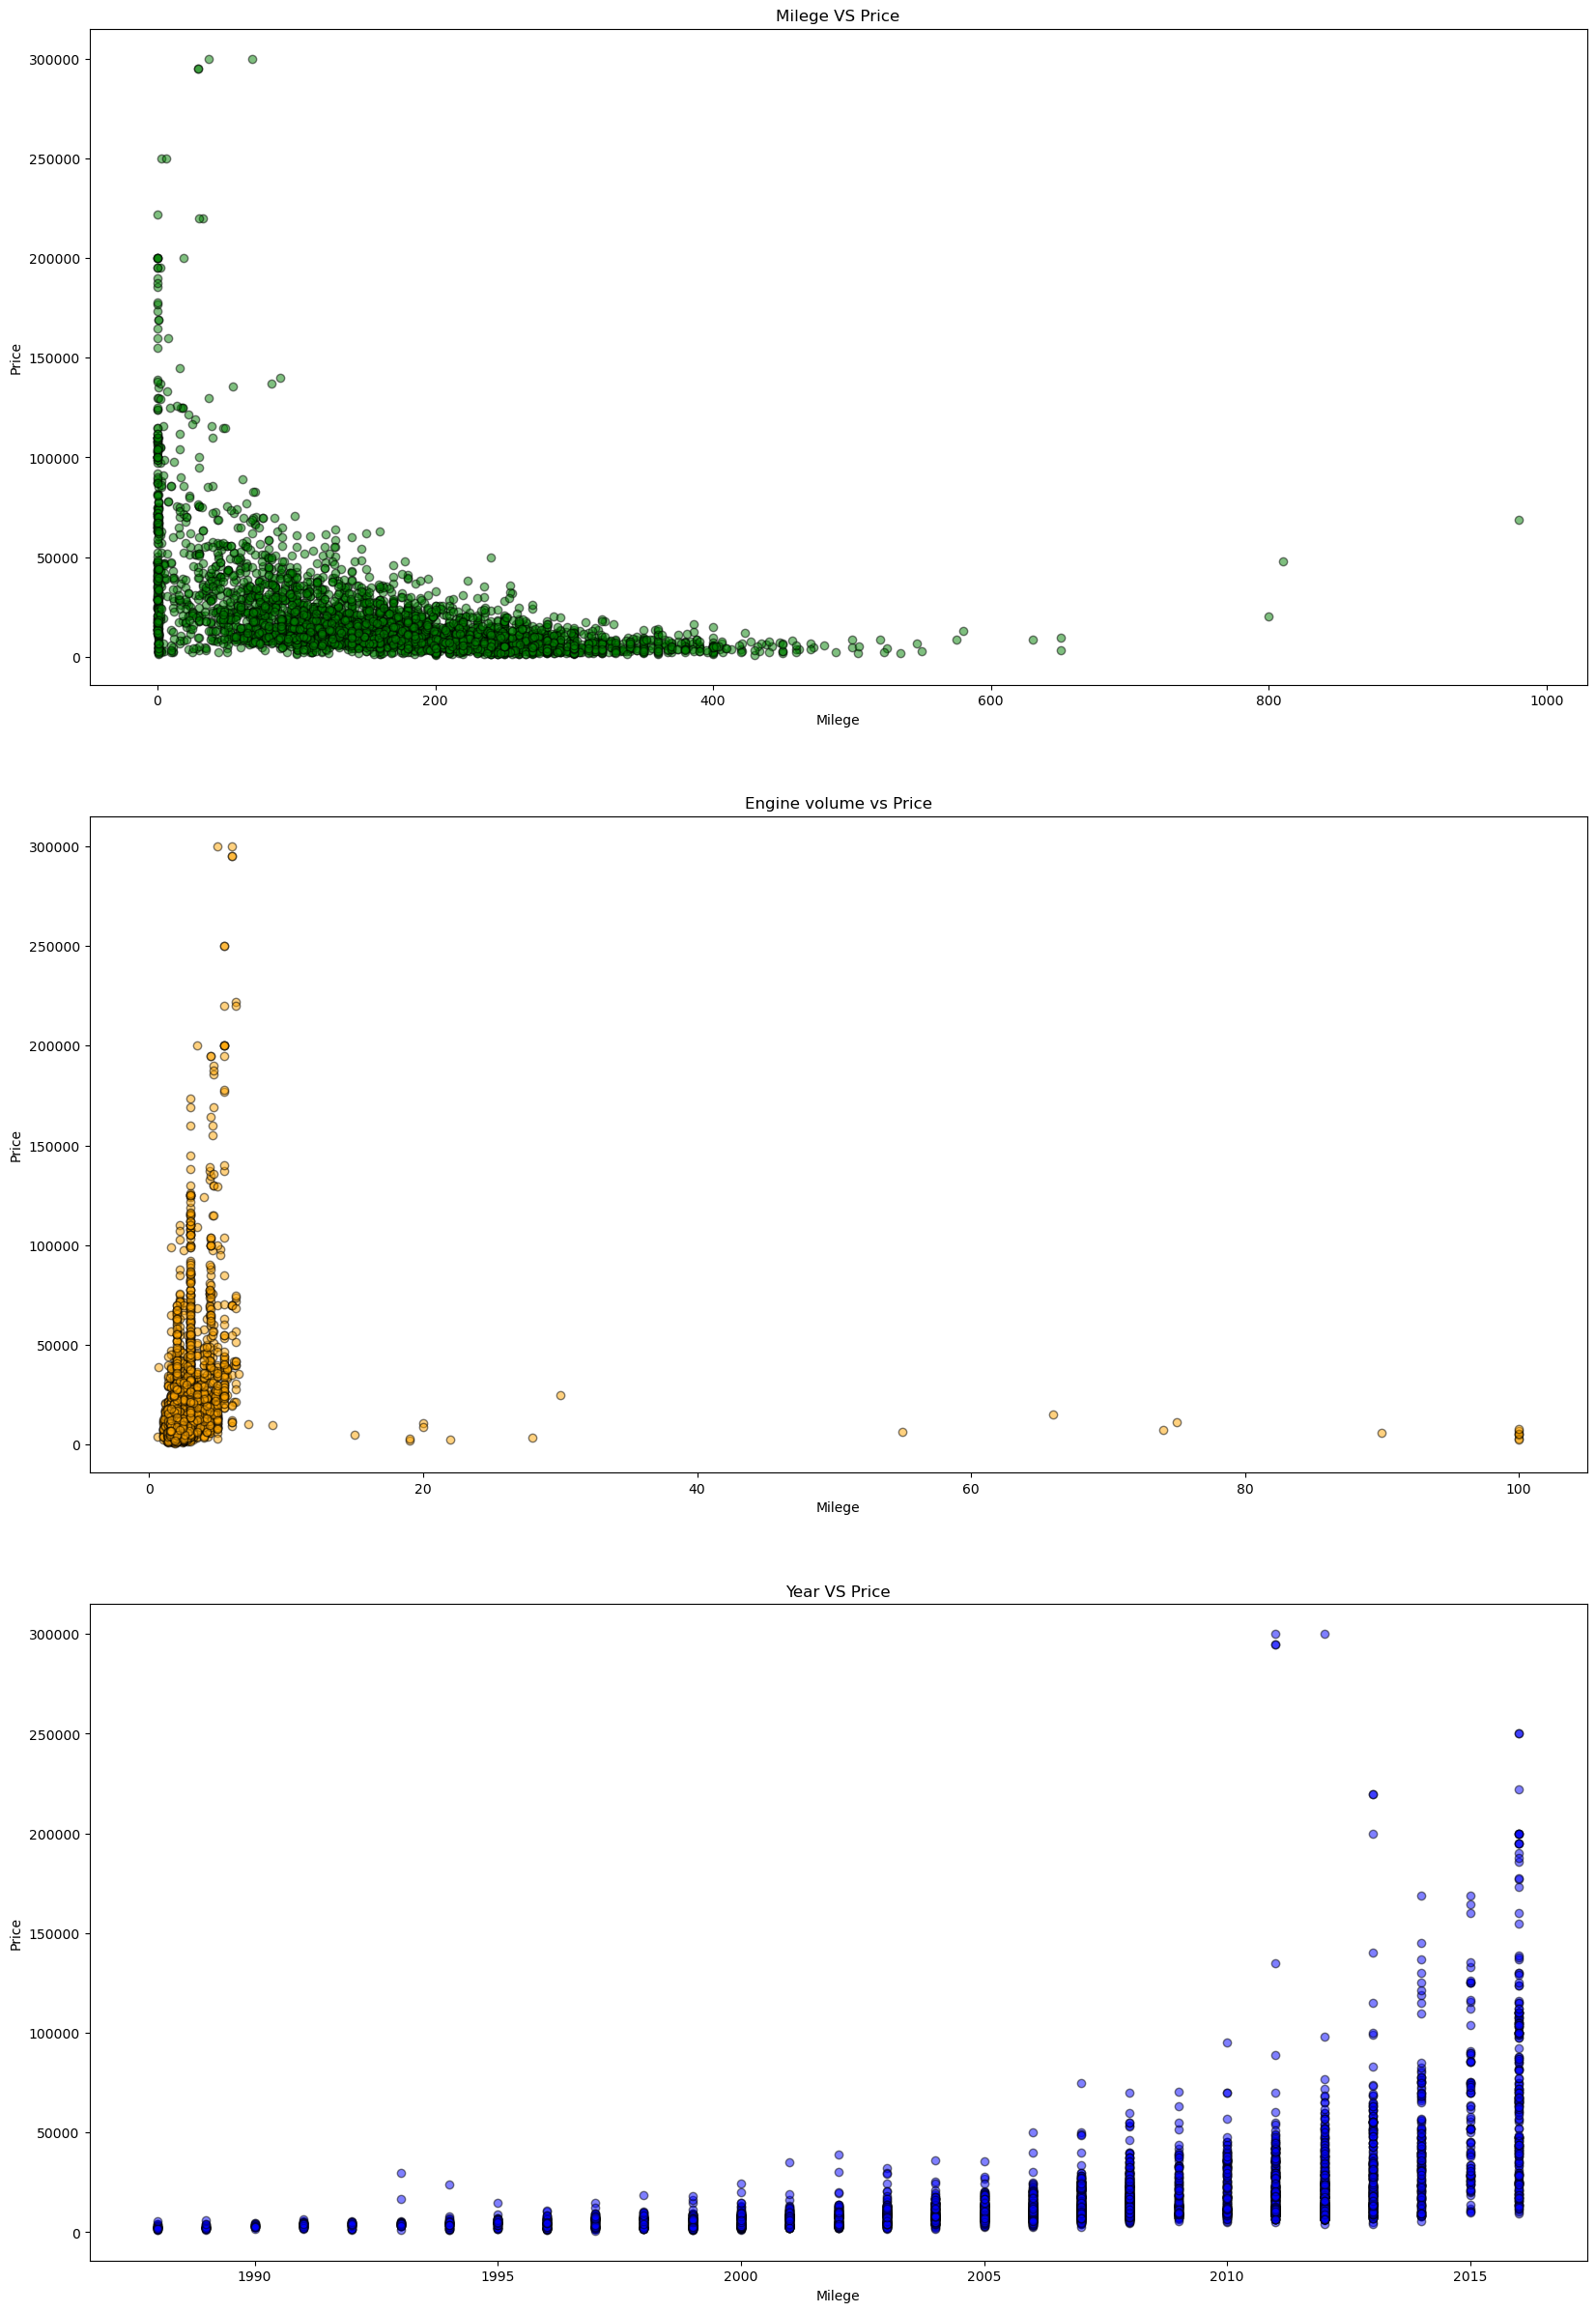

In [668]:
plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
plt.scatter(f_df['Mileage'],f_df['Price'],color='green',alpha=0.5,ec='black')
plt.title('Milege VS Price')
plt.xlabel('Milege')
plt.ylabel('Price')

plt.subplot(3,1,2)
plt.scatter(f_df['EngineV'],f_df['Price'],color='orange',alpha=0.5,ec='black')
plt.title('Engine volume vs Price')
plt.xlabel('Milege')
plt.ylabel('Price')

plt.subplot(3,1,3)
plt.scatter(f_df['Year'],f_df['Price'],color='blue',alpha=0.5,ec='black')
plt.title('Year VS Price')
plt.xlabel('Milege')
plt.ylabel('Price')

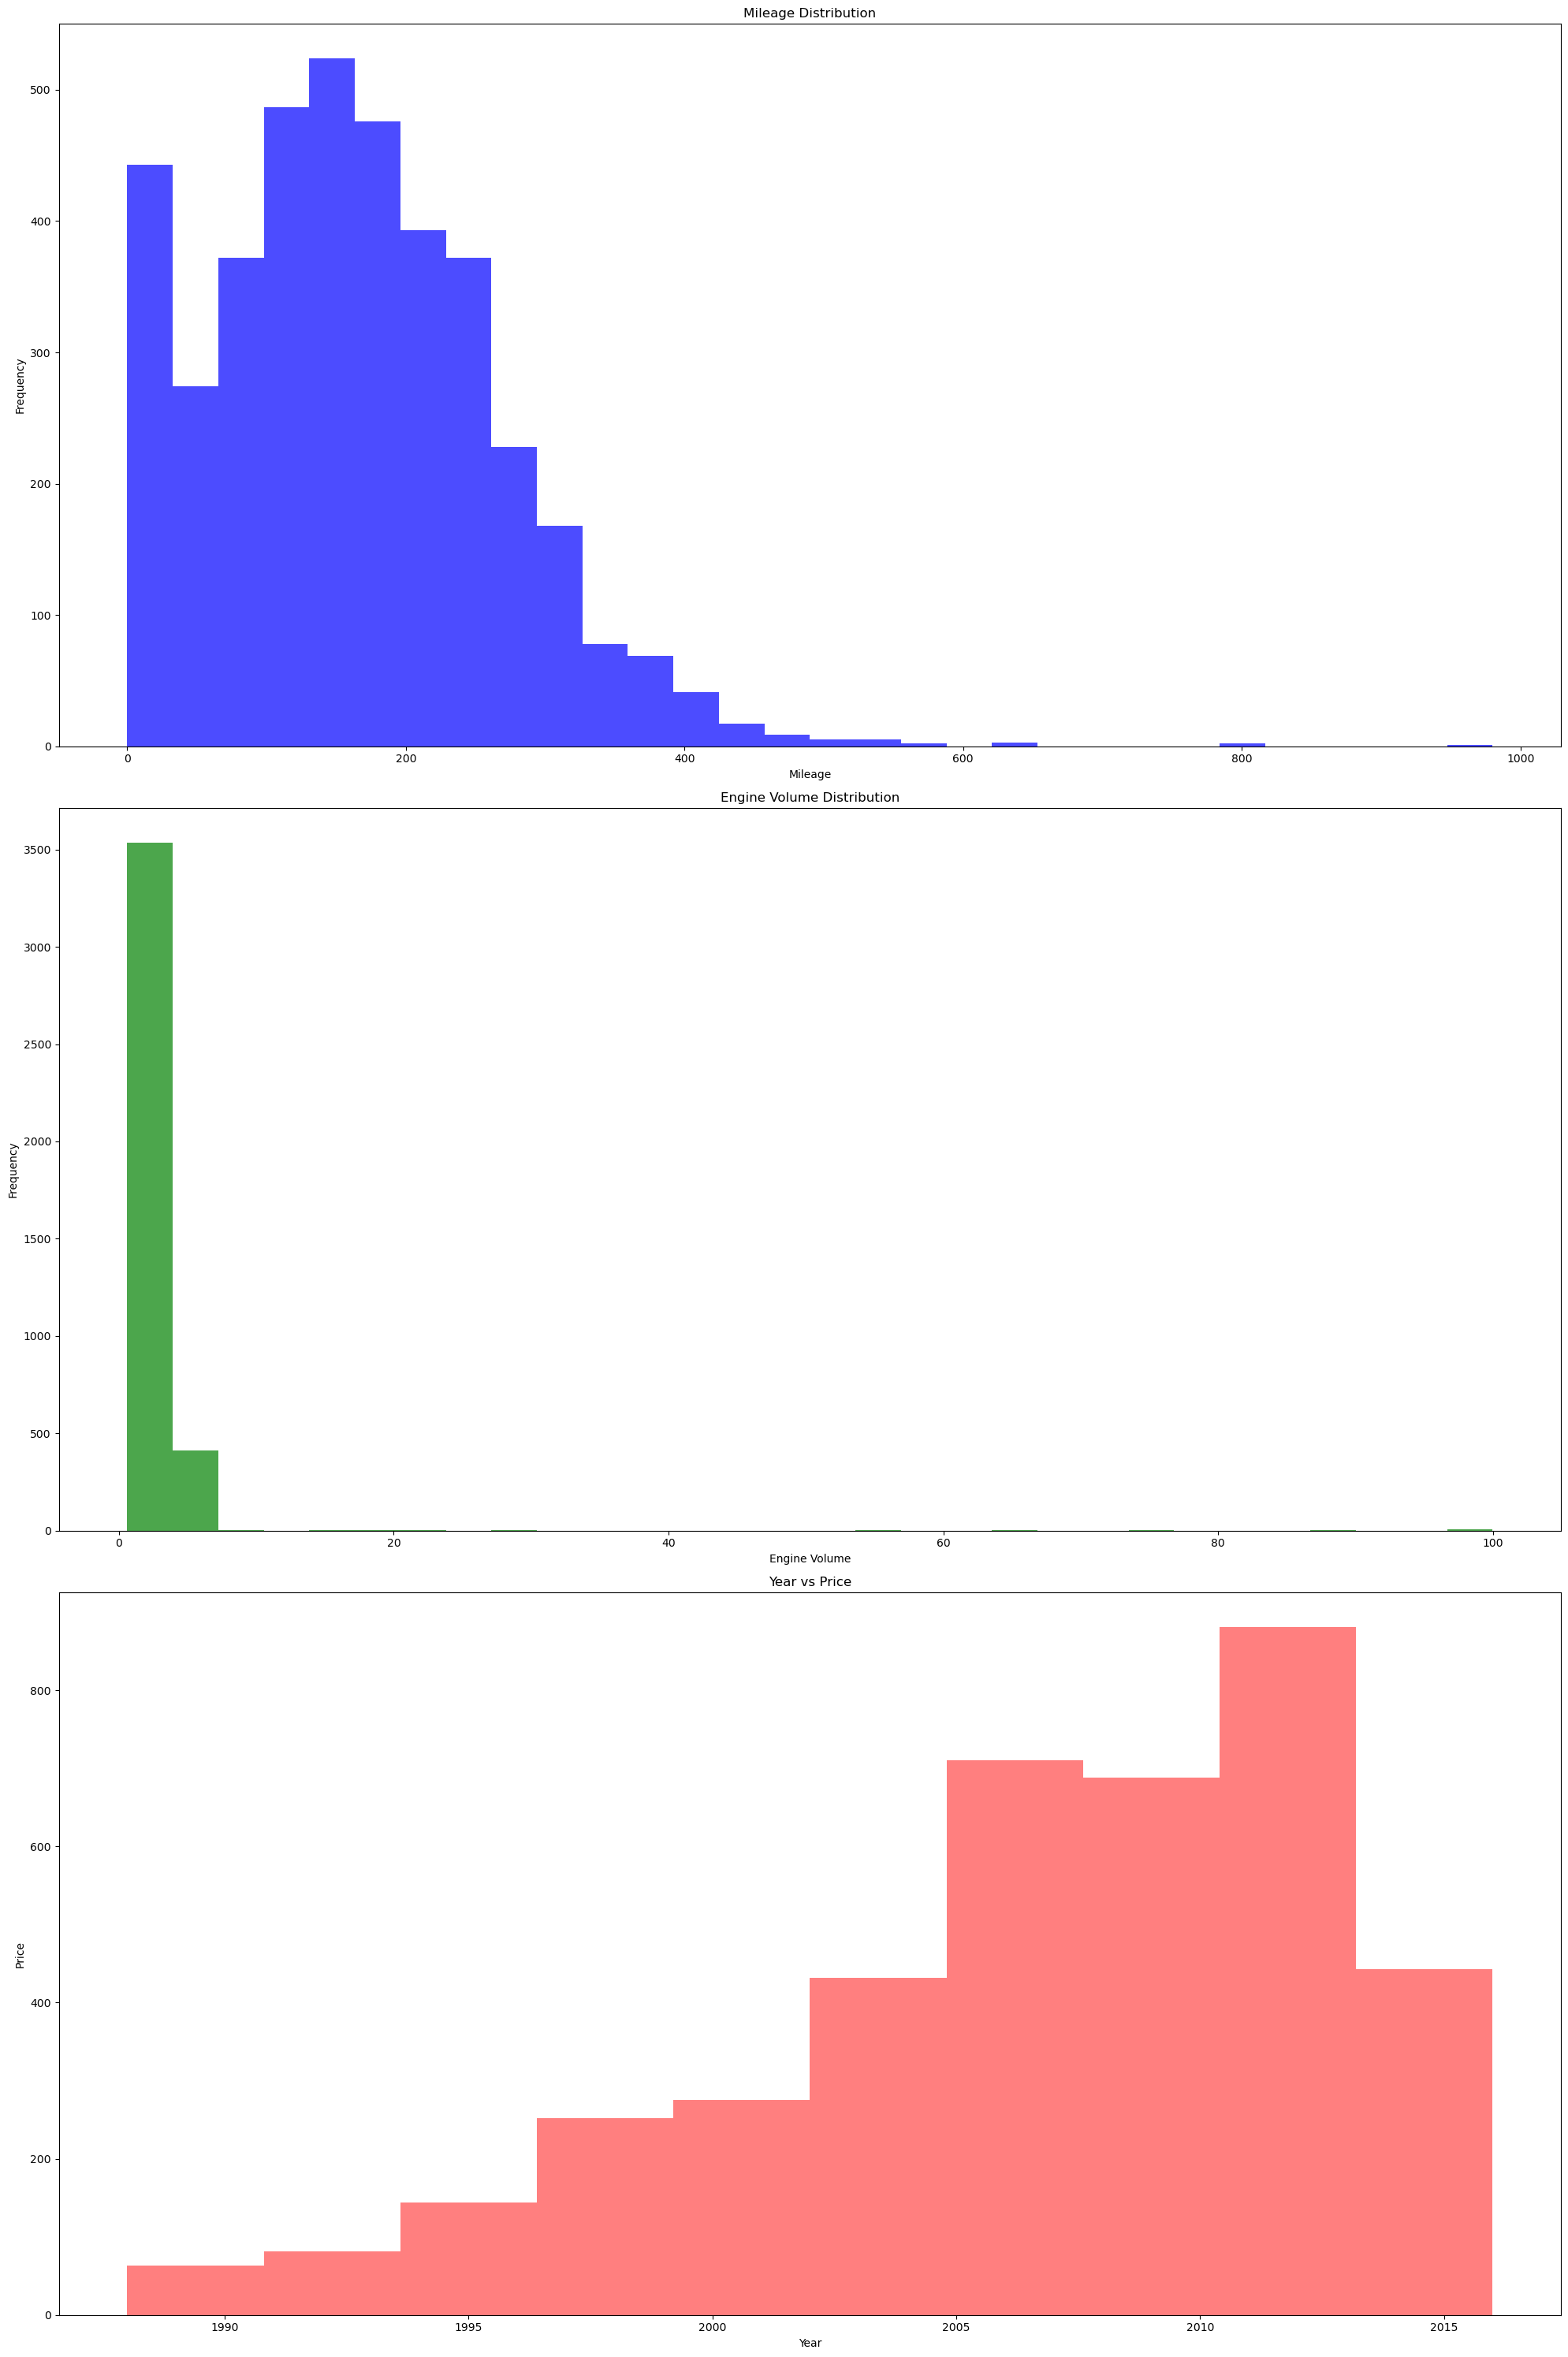

In [670]:
plt.figure(figsize=(20, 30))

plt.subplot(3, 1, 1)
plt.hist(f_df['Mileage'], bins=30, color='blue', alpha=0.7)  # Adjust bins for better visualization
plt.title('Mileage Distribution')
plt.xlabel('Mileage')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(f_df['EngineV'], bins=30, color='green', alpha=0.7)  # Adjust bins for better visualization
plt.title('Engine Volume Distribution')
plt.xlabel('Engine Volume')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(f_df['Year'],color='red', alpha=0.5)
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')

plt.tight_layout()

The analysis you've provided offers a clear rationale for applying a log transformation to the 'Price' variable in the context of regression analysis. Here’s a breakdown of the inference from the graphs and how they lead to this conclusion:

### Inference from the Graphs

1. **Scatter Plots Indicating Non-Linearity**:
   - In the scatter plots for 'Mileage vs Price', 'Engine Volume vs Price', and 'Year vs Price', you may observe a pattern where the relationship between 'Price' and the independent variables is not linear. Instead, these relationships may exhibit an exponential increase or a curvilinear trend, indicating that as 'Mileage', 'Engine Volume', or 'Year' increases, the 'Price' increases at an accelerating rate.

2. **Distribution of ‘Price’**:
   - If you also included a probability density function (PDF) analysis (such as a histogram or kernel density plot), it might reveal that 'Price' is skewed right, characteristic of an exponential distribution. This means that while most cars might have lower prices, a few high-priced outliers pull the mean upwards, making the distribution asymmetrical.

3. **Exponential Pattern**:
   - The observation that 'Price' follows an exponential pattern suggests that a simple linear regression model (like Ordinary Least Squares, OLS) may not adequately capture the relationship between 'Price' and the independent variables. Linear regression assumes that changes in the dependent variable ('Price') are proportional to changes in the independent variables, which may not hold true here.

### Rationale for Log Transformation

1. **Mitigating Exponential Distribution**:
   - By applying a log transformation to 'Price', you effectively compress the scale of the higher values while expanding the lower values. This transformation helps to linearize the relationship between the dependent variable and independent variables, making it more suitable for OLS regression.

2. **Improved Model Assumptions**:
   - The log transformation aligns 'Price' more closely with the assumptions of linearity and homoscedasticity (constant variance of errors) required for OLS regression. It reduces the effect of outliers and makes the data more normally distributed, which is a critical assumption for many statistical models.

3. **Enhanced Interpretability**:
   - Log transformations allow the interpretation of regression coefficients in percentage terms. For instance, a coefficient on a log-transformed dependent variable can be interpreted as the percentage change in 'Price' for a one-unit increase in the independent variable. This makes the results easier to understand and communicate, especially in contexts like economics or finance where relative changes are often more meaningful than absolute changes.

### Conclusion

In summary, the analysis of the scatter plots and the distribution of 'Price' suggests a non-linear relationship, warranting a log transformation to meet OLS regression assumptions. This transformation not only improves the model's fit but also aids in deriving more accurate and interpretable insights, thereby enhancing the robustness of your predictive analyses.

In [672]:
log_price=np.log(f_df['Price'])

In [673]:
log_price

0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
          ...    
3964     9.350102
3965     9.792556
3966    11.736069
3967     8.779557
3968     9.510445
Name: Price, Length: 3969, dtype: float64

In [674]:
f_df['log_price']=log_price

In [675]:
f_df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


Text(0, 0.5, 'Price')

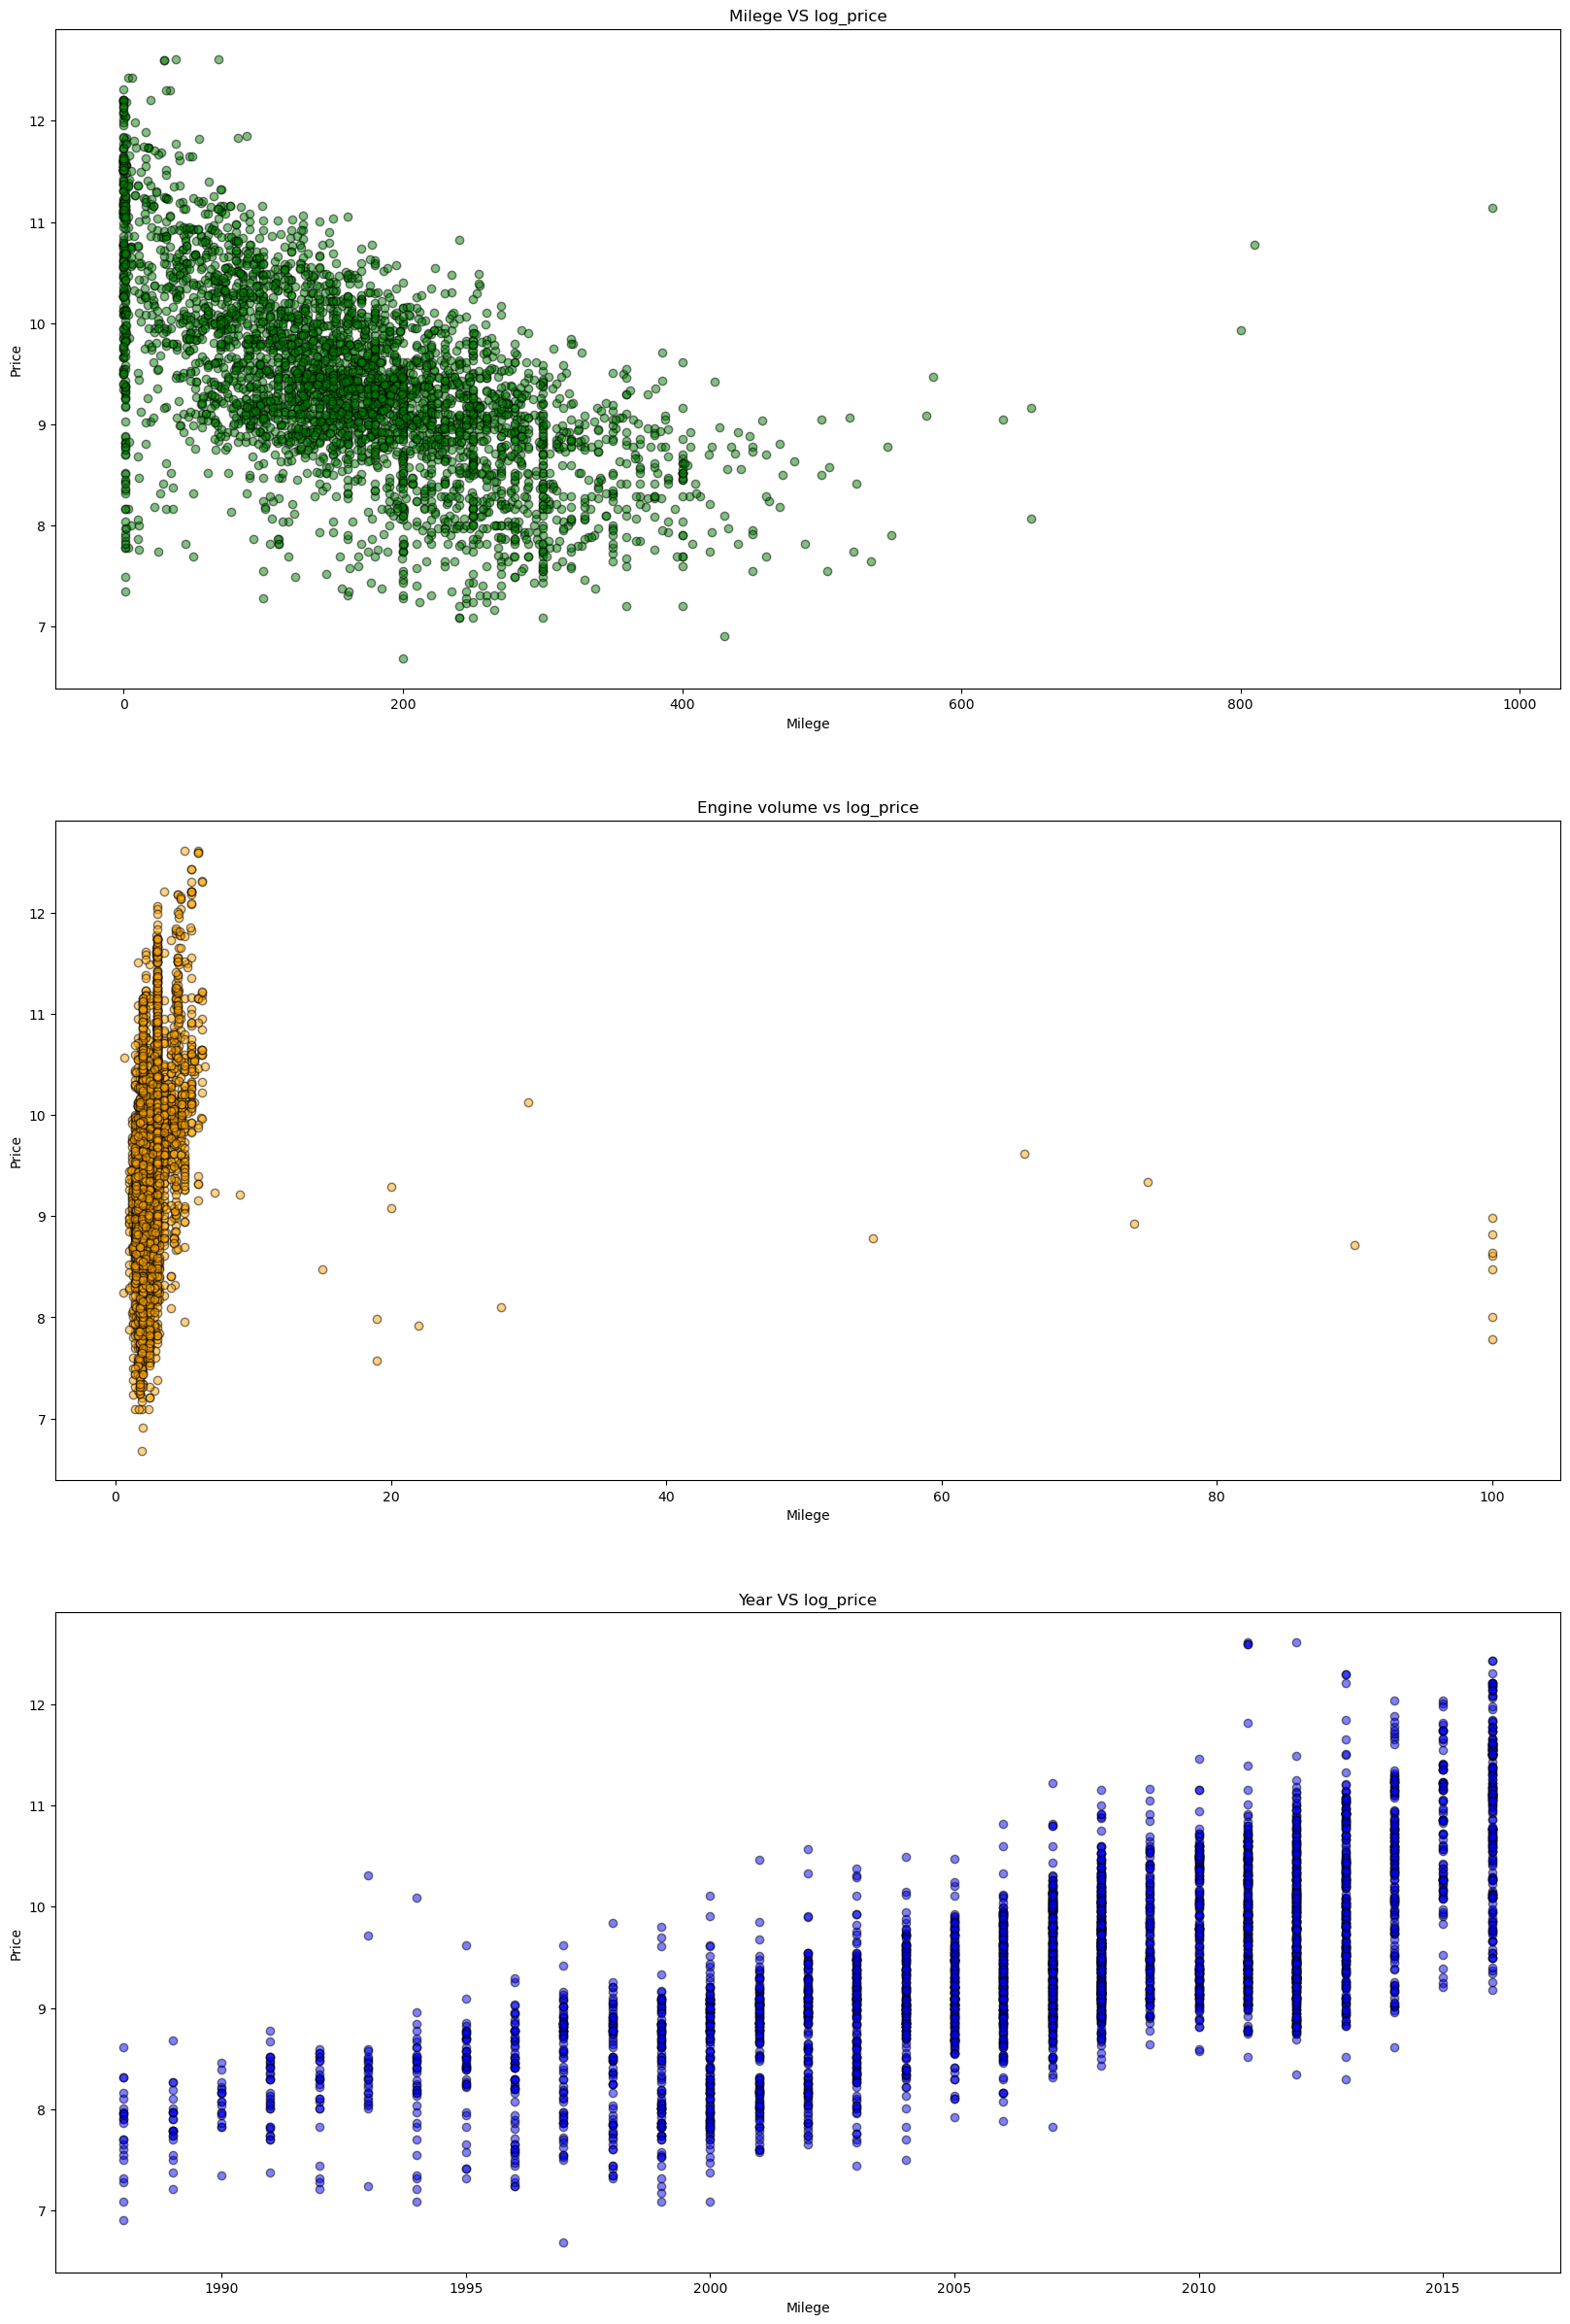

In [676]:
plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
plt.scatter(f_df['Mileage'],f_df['log_price'],color='green',alpha=0.5,ec='black')
plt.title('Milege VS log_price')
plt.xlabel('Milege')
plt.ylabel('Price')

plt.subplot(3,1,2)
plt.scatter(f_df['EngineV'],f_df['log_price'],color='orange',alpha=0.5,ec='black')
plt.title('Engine volume vs log_price')
plt.xlabel('Milege')
plt.ylabel('Price')

plt.subplot(3,1,3)
plt.scatter(f_df['Year'],f_df['log_price'],color='blue',alpha=0.5,ec='black')
plt.title('Year VS log_price')
plt.xlabel('Milege')
plt.ylabel('Price')

#niw since we found the log price and we wontg be using the log price anymore we will be dropping the price

In [678]:
f_df.drop('Price',axis=1,inplace=True)

In [679]:
f_df.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


Understanding Multicollinearity (Beginner-Friendly Explanation)
Multicollinearity happens in linear regression when two or more of the predictor variables (independent variables) are highly correlated with each other. When this occurs, it becomes difficult for the regression model to clearly determine how each predictor affects the outcome (dependent variable).

In simpler terms:

Imagine you’re trying to predict car prices based on things like mileage, engine size, and year. If two of these variables are giving almost the same information (like mileage and engine size being very similar in what they predict), it confuses the model. This confusion makes the coefficients (the numbers that show how much each variable affects the price) unstable and harder to interpret correctly.
What Happens When There’s Multicollinearity?
Inflated standard errors: This means that the model’s estimates become less precise, making it harder to say if a predictor is really important or not.
Unstable coefficients: A small change in your data can lead to big changes in the estimated coefficients.
Interpretation issues: It's difficult to figure out the individual impact of each variable because they overlap in the information they provide.

In [681]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Step 1: Select the predictor variables from your DataFrame
X=f_df[['Mileage', 'EngineV', 'Year']]
# Step 2: Add a constant (intercept)
inflation=pd.DataFrame()
inflation['variable']=X.columns
inflation.head()

,variable
0,Mileage
1,EngineV
2,Year


In [682]:
inflation_values=[]
for i in range(X.shape[1]):
    inflation_v=variance_inflation_factor(X.values,i)
    inflation_values.append(inflation_v)
inflation['VIF']=inflation_values

In [683]:
inflation

,variable,VIF
0,Mileage,3.479078
1,EngineV,1.312987
2,Year,3.741510


When building a regression model, we want to avoid a problem called **multicollinearity**. Multicollinearity happens when one predictor variable (like mileage, engine volume, or year) is highly related to one or more other predictors in the model. This creates problems because the model has trouble deciding which predictor to use, making it hard to understand the true effect of each variable.

All the VIF values are well below 10, which means none of your predictors are causing significant multicollinearity.

Here’s what this means:

Mileage (3.48) and Year (3.74) show some relationship with other predictors but are not problematic.
EngineV (1.31) is very low, indicating minimal correlation with other predictors.
In summary, your model is in good shape regarding multicollinearity, and you don’t need to remove any variables based on these VIF scores

If it was above 10 drop that column 

In [687]:
f_df

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3964,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3965,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3966,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3967,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


In [688]:
data=pd.get_dummies(f_df,drop_first=True)

In [689]:
data.columns

Index(['Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype='object')

In [690]:
cols=['log_price','Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data=data[cols]

In [691]:
data

,log_price,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1991,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,1999,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,2003,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,2007,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,2011,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3964,9.350102,163,2.5,2008,9.350102,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3965,9.792556,35,1.6,2014,9.792556,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3966,11.736069,9,3.0,2014,11.736069,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3967,8.779557,1,3.5,1999,8.779557,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


### **DATA MODELLING**

Linear Regression:

In linear regression, we split our data into two parts: **input variables** (features) and the **target variable** (labels- what we’re trying to predict). The model uses the input variables to learn patterns and make predictions about the target. This split ensures that the model knows what to focus on for accurate predictions.

In [694]:
targets = data['log_price']

inputs = data.drop(['log_price'],axis=1)

In [695]:
inputs

,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,1999,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,2003,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,2007,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,2011,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3964,163,2.5,2008,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3965,35,1.6,2014,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3966,9,3.0,2014,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3967,1,3.5,1999,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [696]:
from sklearn.preprocessing import StandardScaler

In [697]:
scalar=StandardScaler()
scalar.fit(inputs)
inputs_scaled=scalar.transform(inputs)

In [698]:
inputs_scaled

array([[ 1.11022942, -0.15619659, -2.52941788, ..., -0.16322538,
         1.32451397,  0.32111188],
       [ 2.56771079,  0.02493478, -1.23954273, ..., -0.16322538,
        -0.75499392,  0.32111188],
       [ 1.89726936,  0.44757465, -0.59460515, ..., -0.16322538,
        -0.75499392,  0.32111188],
       ...,
       [-1.49380395,  0.04506049,  1.17897319, ..., -0.16322538,
        -0.75499392,  0.32111188],
       [-1.57153629,  0.14568903, -1.23954273, ..., -0.16322538,
         1.32451397,  0.32111188],
       [-0.37640157, -0.15619659,  1.0177388 , ..., -0.16322538,
        -0.75499392,  0.32111188]])

In [699]:
from sklearn.model_selection import train_test_split

Let’s partition the data into training and testing sets. The training set is utilized to train the machine learning model, while the test set is reserved for evaluating the model’s performance.

In [701]:
 X_train, X_test, y_train, y_test = train_test_split(inputs_scaled,targets, test_size=0.2, random_state=101)

Data division into training and testing sets is essential for machine learning. The training set instructs the model on data patterns, while the untouched testing set evaluates its predictive accuracy. This bifurcation ensures an unbiased assessment, gauging the model’s ability to generalize to new, unseen data. The training-test split is a fundamental step in model assessment, guaranteeing reliability and applicability to diverse scenarios.

In [703]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [704]:
#prediction
prediction=lr.predict(X_train)

In [705]:
prediction.shape

(3175, 2)

In [706]:
y_train.shape

(3175, 2)

Text(0, 0.5, 'prediction')

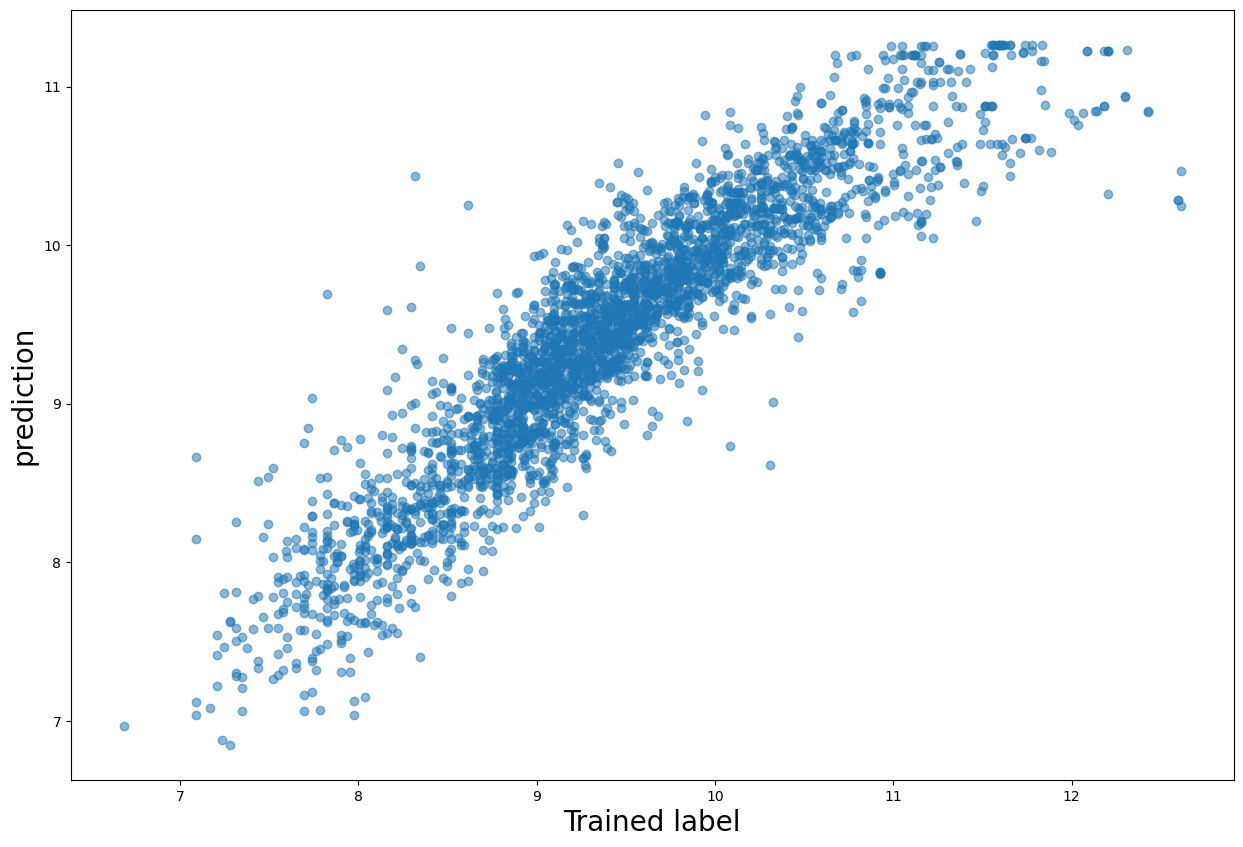

In [707]:
plt.figure(figsize=(15,10))
plt.scatter(y_train,prediction,alpha=0.3)

plt.xlabel('Trained label',fontsize=20)
plt.ylabel('prediction',fontsize=20) 

 Observing that your predictions align closely with the 45-degree line on the scatter plot is a great indicator of model accuracy and consistency. This alignment means that, for each actual target value (on the x-axis), the model's prediction (on the y-axis) is close to that target, suggesting a strong correlation between the predicted and actual values.

This close match implies that the model learned the patterns in the training data well and generalizes effectively to new data if the plot represents test results. If you consistently see this in both training and test sets, it suggests that your model is well-calibrated and free from overfitting or underfitting issues.

<Figure size 1000x1000 with 0 Axes>

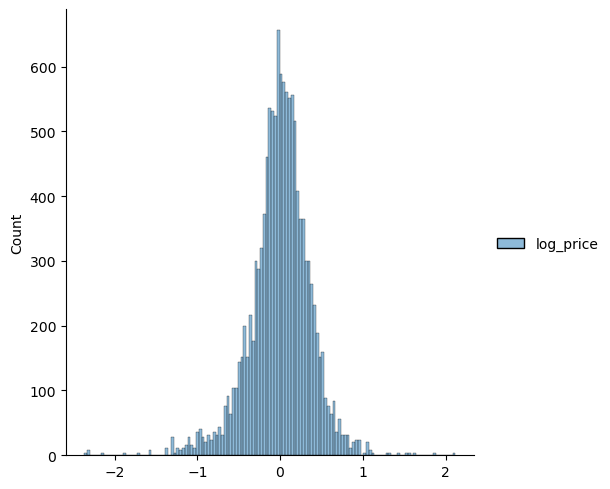

In [709]:
plt.figure(figsize=(10,10))
sns.displot(prediction-y_train)

The histogram of residuals suggests that while the model's predictions are generally close to the actual values, as indicated by the peak around zero, there is a notable skew towards negative residuals. These negative residuals imply that, in many cases, the model is overpredicting the target values, meaning the predictions are higher than the actual outcomes. The extended left tail highlights that these overpredictions are more significant and frequent compared to underpredictions. Ideally, residuals should form a symmetric, normal distribution centered around zero, which would indicate unbiased predictions with errors evenly distributed. The skewness observed here suggests a systematic bias in the model, where it struggles with certain data points, leading to consistent overestimations. To address this, further model refinement, such as investigating outliers, adjusting the model's complexity, or revisiting assumptions, could help improve its performance.

In [711]:
lr.fit(X_train,y_train)
score=lr.score(X_train,y_train)
lr.fit(X_train,y_train)
intercept=lr.intercept_
coef=lr.coef_
print('Score is:',score)
print('intercept is:',intercept)
print('coefficients are:',coef)

Score is: 0.8337936563917545
intercept is: [9.43319727 9.43319727]
coefficients are: [[-0.0920915   0.02020904  0.5365263   0.03319398  0.06018833 -0.16961781
  -0.25291522 -0.08052726 -0.14668959 -0.17054115 -0.11256864 -0.23581987
  -0.15624675 -0.22579351 -0.02046117 -0.01503714 -0.02270627  0.26077656]
 [-0.0920915   0.02020904  0.5365263   0.03319398  0.06018833 -0.16961781
  -0.25291522 -0.08052726 -0.14668959 -0.17054115 -0.11256864 -0.23581987
  -0.15624675 -0.22579351 -0.02046117 -0.01503714 -0.02270627  0.26077656]]


In [712]:
X_train.shape

(3175, 18)

In [713]:
y_train.shape

(3175, 2)

The output you've provided shows the results of a regression model, likely a multiple linear regression based on the score, intercepts, and coefficients. Here's a breakdown of the key components:

1. **Score (R² value)**: The score of approximately **0.83** indicates that about **83% of the variance** in the dependent variable can be explained by the independent variables in your model. This suggests a relatively strong fit, meaning your model performs well in predicting the outcome based on the input features.

2. **Intercept**: The intercept values of **9.43** suggest the expected value of the dependent variable when all independent variables are zero. Since you have two intercepts, this might indicate you're using a model with multiple outputs or predicting two dependent variables.

3. **Coefficients**: The coefficients represent the change in the dependent variable for a one-unit change in each independent variable, holding all other variables constant. The coefficients you provided are:
   - They are organized in a 2D array, which suggests that your model may predict multiple outputs or is structured for a multi-output regression.
   - Some coefficients are negative (e.g., -0.092, -0.169, -0.252), meaning an increase in the corresponding independent variable would lead to a decrease in the predicted outcome, while positive coefficients (e.g., 0.536, 0.033) indicate a positive relationship.

In [715]:
features = inputs.columns.values
final_summary = pd.DataFrame()
for i in range(lr.coef_.shape[0]):
    lr_summary = pd.DataFrame({
        'Features': features,               
        'Weights': lr.coef_[i],             
    })    
    final_summary = pd.concat([final_summary, lr_summary], ignore_index=True)
final_summary

,Features,Weights
0,Mileage,-0.092092
1,EngineV,0.020209
2,Year,0.536526
3,Brand_BMW,0.033194
4,Brand_Mercedes-Benz,0.060188
5,Brand_Mitsubishi,-0.169618
6,Brand_Renault,-0.252915
7,Brand_Toyota,-0.080527
8,Brand_Volkswagen,-0.146690
9,Body_hatch,-0.170541


To evaluate the model’s performance, we can apply it to predict outcomes using the `x_test` data. This testing phase assesses how well the model generalizes to new, unseen data.

In [717]:
prediction_test=lr.predict(X_test)
prediction_test

array([[11.25882771, 11.25882771],
       [ 9.91042319,  9.91042319],
       [ 9.37546191,  9.37546191],
       ...,
       [ 9.215923  ,  9.215923  ],
       [ 7.86550176,  7.86550176],
       [ 9.3295459 ,  9.3295459 ]])

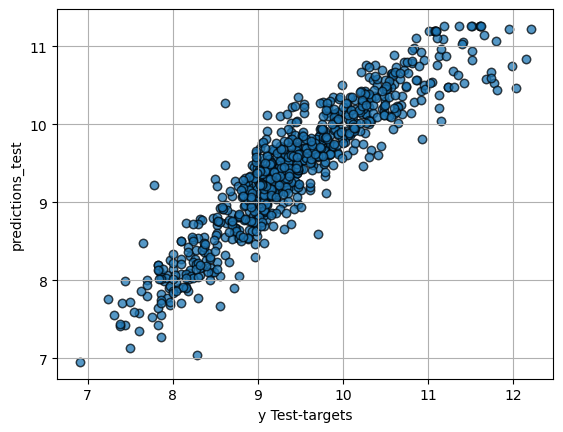

In [718]:
plt.scatter(y_test,prediction_test,alpha=0.5,edgecolors='black')
plt.xlabel('y Test-targets')
plt.ylabel('predictions_test')
plt.grid(True)

The presence of a 45-degree alignment suggests that the regression is effectively predicting values close to the actual ones, indicating a reasonable performance in capturing the underlying patterns in the data.

To obtaining the actual prices, we take the exponential of the log_price



In [720]:
prediction_test.shape

(794, 2)

In [721]:
prediction.shape

(3175, 2)

In [722]:
final_df = pd.DataFrame(np.exp(prediction_test))

In [723]:
final_df

,0,1
0,77561.597614,77561.597614
1,20139.194979,20139.194979
2,11795.364727,11795.364727
3,8956.724107,8956.724107
4,6541.423892,6541.423892
...,...,...
789,11306.185700,11306.185700
790,24195.755314,24195.755314
791,10055.982401,10055.982401
792,2605.817600,2605.817600


In [724]:
y_test=y_test.iloc[:,1]

In [725]:
final_df['target']=np.exp(y_test)

In [726]:
final_df.head()

,0,1,target
0,77561.597614,77561.597614,NaN
1,20139.194979,20139.194979,NaN
2,11795.364727,11795.364727,NaN
3,8956.724107,8956.724107,NaN
4,6541.423892,6541.423892,18300.0


In [727]:
final_df=final_df.iloc[:,1:]

In [728]:
final_df

,1,target
0,77561.597614,NaN
1,20139.194979,NaN
2,11795.364727,NaN
3,8956.724107,NaN
4,6541.423892,18300.0
...,...,...
789,11306.185700,NaN
790,24195.755314,12000.0
791,10055.982401,NaN
792,2605.817600,23000.0


In [729]:
final_df.rename(columns={1: 'Prediction'},inplace=True)

In [730]:
final_df

,Prediction,target
0,77561.597614,NaN
1,20139.194979,NaN
2,11795.364727,NaN
3,8956.724107,NaN
4,6541.423892,18300.0
...,...,...
789,11306.185700,NaN
790,24195.755314,12000.0
791,10055.982401,NaN
792,2605.817600,23000.0


Looks like The old indexes are carry forwarded till the process. To get a proper result we must reset the index and drop the old indexing

In [732]:
y_test=y_test.reset_index(drop=True)

In [733]:
final_df['target']=np.exp(y_test)

In [734]:
final_df

,Prediction,target
0,77561.597614,71999.0
1,20139.194979,17500.0
2,11795.364727,12900.0
3,8956.724107,8500.0
4,6541.423892,6999.0
...,...,...
789,11306.185700,10500.0
790,24195.755314,38764.0
791,10055.982401,2400.0
792,2605.817600,3100.0


Create an additional column named “Residual,” representing the difference between the targets and the corresponding predictions. This column provides a direct measure of the model’s accuracy, revealing how closely the predicted values align with the actual targets.

In [736]:
final_df['Residuals']=final_df['target']-final_df['Prediction']

In [737]:
final_df

,Prediction,target,Residuals
0,77561.597614,71999.0,-5562.597614
1,20139.194979,17500.0,-2639.194979
2,11795.364727,12900.0,1104.635273
3,8956.724107,8500.0,-456.724107
4,6541.423892,6999.0,457.576108
...,...,...,...
789,11306.185700,10500.0,-806.185700
790,24195.755314,38764.0,14568.244686
791,10055.982401,2400.0,-7655.982401
792,2605.817600,3100.0,494.182400


In [738]:
final_df['difference%']=np.absolute(final_df['Residuals']*100/final_df['target'])

In [739]:
final_df

,Prediction,target,Residuals,difference%
0,77561.597614,71999.0,-5562.597614,7.725937
1,20139.194979,17500.0,-2639.194979,15.081114
2,11795.364727,12900.0,1104.635273,8.563064
3,8956.724107,8500.0,-456.724107,5.373225
4,6541.423892,6999.0,457.576108,6.537736
...,...,...,...,...
789,11306.185700,10500.0,-806.185700,7.677959
790,24195.755314,38764.0,14568.244686,37.581892
791,10055.982401,2400.0,-7655.982401,318.999267
792,2605.817600,3100.0,494.182400,15.941368


In [740]:
y_true = final_df["target"]       
y_pred = final_df["Prediction"]   

In [741]:
metrics = {
    "Metric": ["R² Score", "Mean Absolute Error (MAE)", "Root Mean Squared Error (RMSE)"],
    "Value": [
        r2_score(y_true, y_pred),  
        mean_absolute_error(y_true, y_pred),  
        np.sqrt(mean_squared_error(y_true, y_pred))  
    ]
}

In [746]:
metrics_df = pd.DataFrame(metrics).set_index("Metric")
metrics_df

,Value
Metric,
R² Score,0.619764
Mean Absolute Error (MAE),5813.031612
Root Mean Squared Error (RMSE),14649.823802


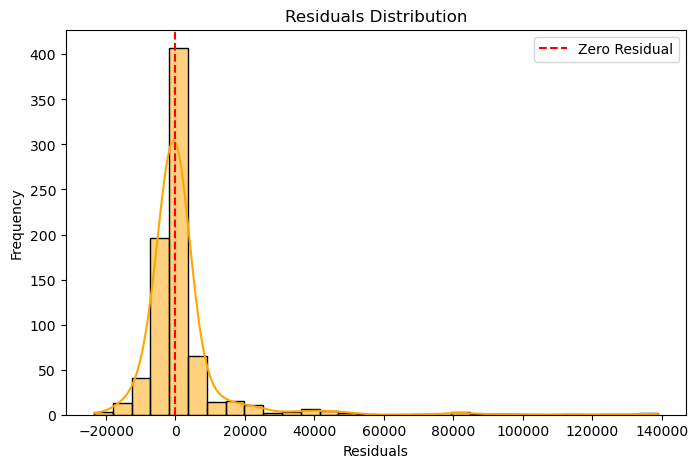

In [748]:
plt.figure(figsize=(8, 5))
sns.histplot(final_df["Residuals"], bins=30, kde=True, color="orange")
plt.axvline(x=0, color='red', linestyle='--', label="Zero Residual")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()

According to the Residuals Distribution plot, the majority of residuals cluster around zero, suggesting that the model's predictions and actual values are typically quite similar. A small number of larger residuals show some variability, but the sharp peak at zero indicates that most predictions have little error. There are very few cases of higher deviations, giving the model good overall performance.

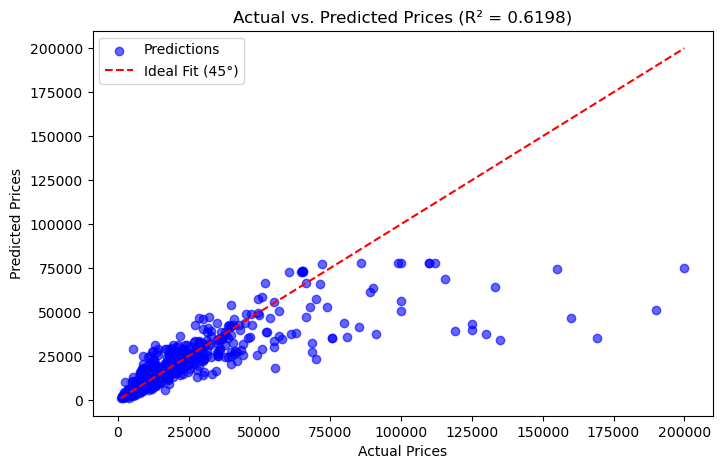

In [751]:
r2 = metrics["Value"][metrics["Metric"].index("R² Score")]  

plt.figure(figsize=(8, 5))
plt.scatter(y_true, y_pred, alpha=0.6, color="blue", label="Predictions")
plt.plot([min(y_true), max(y_true)], 
         [min(y_true), max(y_true)], 
         color='red', linestyle='--', label="Ideal Fit (45°)")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"Actual vs. Predicted Prices (R² = {r2:.4f})")  # Use extracted R² score
plt.legend()
plt.show()

With an R2 score of 0.6198, the scatter plot of Actual vs. Predicted Prices demonstrates the model's moderate correlation.  For lower and mid-range prices, most forecasts are fairly accurate, as they are near the optimal 45-degree line.  The difference in predictions, however, widens as the actual price rises, with some points departing noticeably from the anticipated pattern.  This shows that while the model does well for typical price ranges, it is not very good at correctly predicting high-value outliers.

### **Conclusion**  

The machine learning model developed for car price prediction provides **accurate price estimates** by analyzing key factors like **brand, mileage, engine size, and year of manufacture**. With an **R² score of 0.6198**, the model performs well for **low and mid-range cars**, while predictions for **high-value cars show more variation** due to factors not included in the dataset.  

This model can help **businesses, dealerships, and pricing analysts** in making better pricing decisions and improving valuation processes. While it works well for most price ranges, adding more details like **vehicle condition, location, and market demand** can further improve accuracy, especially for high-end cars.  

Going forward, this model can be used as part of a **pricing strategy** to help businesses set competitive prices, optimize inventory, and offer better insights to customers. Future improvements can focus on **real-time market trends** and advanced techniques to enhance performance.